In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.layers as tfkl
import matplotlib.pyplot as plt

from IPython.display import clear_output
import time

from polymorphic_dense import PolymorphicDense, ControlledPolymorphicDense

In [5]:
tf.keras.backend.clear_session()

inp = tfkl.Input(shape=[1])
hid = inp
key = inp

key = tfkl.Dense(units=1, activation='tanh')(key)
hid = ControlledPolymorphicDense(units=1, modes=8)([key, hid])

model = tf.keras.Model(inputs = inp, outputs = hid)
model.summary()

optimizer = tf.optimizers.Nadam(.01)
model.compile(loss='MSE', optimizer=optimizer)

inps = 201
scope = 10
v_scaling = 5
x = np.reshape(np.linspace(-scope, scope, inps), [-1, 1])
y = np.sin(x*15/scope)*x+x**1

vx = np.reshape(np.linspace(-int(scope*v_scaling), int(scope*v_scaling), inps), [-1, 1])
vy = np.sin(vx*15/scope)*vx+vx**1

model.fit(x=x, y=y, epochs=1, verbose=0)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 1)            2           input_1[0][0]                    
__________________________________________________________________________________________________
controlled_polymorphic_dense (C (None, 1)            32          dense[0][0]                      
                                                                 input_1[0][0]                    
Total params: 34
Trainable params: 34
Non-trainable params: 0
__________________________________________________________________________________________________


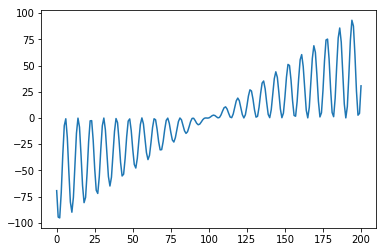

In [6]:
for step in range(3000):
    model.fit(x=x, y=y, epochs=1, verbose=0)
    vy_ = np.reshape(model.predict(vx), [-1])
    clear_output(wait=True)
    
    vyr = np.reshape(vy, [-1])
    plt.plot(vyr)
    plt.plot(vy_)
    plt.show()